<img src="fifa.jpeg" style="float:left">

# Fifa 19 Dataset - Transfer Value predicting Regression Model

# Importing required Packages

In [ ]:
!pip install refractml

In [ ]:
!pip show refractml

In [ ]:
!pip uninstall -y urllib3

In [ ]:
!pip show urllib3

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from refractml import *
from refractml.constants import MLModelFlavours

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Loading Dataset

In [2]:
# Load the data
data = pd.read_csv("/notebooks/notebooks/fifa.csv")
data.head(10)

,short_name,nationality,overall,potential,wage_eur,value_eur,age,height_cm,weight_kg,attacking_crossing,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,Argentina,94,94,565000,95500000,32,170,72,88,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,Portugal,93,93,405000,58500000,34,187,83,84,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,Brazil,92,92,290000,105500000,27,175,68,87,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,Slovenia,91,93,125000,77500000,26,188,87,13,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,Belgium,91,91,470000,90000000,28,175,74,81,...,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,Belgium,91,91,370000,90000000,28,181,70,93,...,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,Germany,90,93,250000,67500000,27,187,85,18,...,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,Netherlands,90,91,200000,78000000,27,193,92,53,...,62,89,91,92,85,13,10,13,11,11
8,L. Modric,Croatia,90,90,340000,45000000,33,172,66,86,...,82,92,68,76,71,13,9,7,14,9
9,M. Salah,Egypt,90,90,240000,80500000,27,175,71,79,...,77,91,38,43,41,14,14,9,11,14


# Seperating Dataset into Training and Test

Matplotlib created a temporary cache directory at /tmp/matplotlib-icd07igc because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


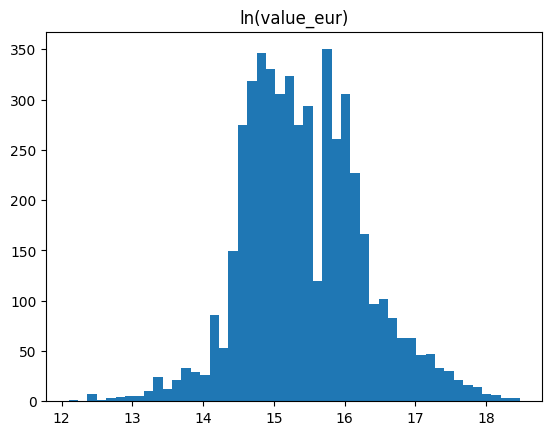

In [3]:
X = data[['age','height_cm','weight_kg','skill_dribbling','attacking_crossing','attacking_finishing','movement_acceleration','movement_sprint_speed','power_shot_power','mentality_aggression','defending_marking','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling','overall','potential']]
y = data['value_eur']
ylog = np.log(y)

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(ylog, bins='auto')
plt.title("ln(value_eur)")
plt.show()

X_train, X_test, ylog_train, ylog_test, y_train, y_test = train_test_split(X, ylog, y, test_size=0.25, random_state=4)

# Training the Model

In [4]:
gbm_default = GradientBoostingRegressor()
gbm_default.fit(X_train, y_train)

GradientBoostingRegressor()

# Defining a Score Function

In [5]:
@scoring_func
def score(model, request):
    payload = request.json["payload"]
    data_list = payload
    data_array = np.asarray(data_list)
    try:
        prediction = model.predict(data_array)
    except:
        prediction = model.predict(data_array.reshape(1, -1))
    return prediction.tolist()


# Testing Score Function

In [6]:
# to verify if score func works

import requests
req = requests.Request()
req.json = {"payload":X_test}

'''
Reference Sample Payload 

req.json = {"payload": [ 25, 185,  88,  78,  65,  81,  77,  75,  81,  63,  37,  26,   9,
        10,  79,  82]}
        
'''
score(gbm_default, req)

[7371874.661681471,
 4738569.183719679,
 21420646.724212054,
 18565368.234815322,
 2521068.456590734,
 4927893.68611642,
 17717792.640952602,
 536649.2767679258,
 5379405.813943992,
 2782661.685757643,
 3109098.804303743,
 3854078.9689723505,
 4098721.5563835106,
 7769807.65253934,
 4692304.372048857,
 16930281.548238754,
 3473019.661723148,
 6661265.3942743195,
 3016063.327552544,
 10421430.298660975,
 1978920.7122082582,
 2802425.7801835793,
 905938.3801071722,
 7703026.231638118,
 4737163.454637375,
 9200545.134584034,
 40671774.99537543,
 11732600.005104978,
 11769365.628129423,
 127060.88757149577,
 5192798.59725835,
 3933793.16651854,
 2461772.7940336033,
 17703016.395034228,
 5660456.16085337,
 2502423.5050830925,
 6259869.183645456,
 8698457.579092508,
 1833849.8102294619,
 4711891.257815065,
 2820859.974634946,
 2385315.894151529,
 1986428.0458969297,
 7220836.170301253,
 2028027.9431738039,
 1953495.1905439002,
 3606521.7807429824,
 2197176.3340813695,
 6941085.884180221,
 56

# Calculating Y_true and Y_pred

In [7]:
Y_true = y_test

Y_pred = gbm_default.predict(X_test)
features = list(X_train)

In [ ]:
!pip show scikit-learn

# Registering the Model

In [ ]:
register_model(
    gbm_default,
    score,
    "fifa_model_v4_21mar",
    "fifa_regression",
    MLModelFlavours.sklearn,
    init_script="pip install scikit-learn==1.3.2",
    input_type="json",
    explain_ai=True,
    x_train=X_train, 
    y_train=y_train, 
    y_true=Y_true,
    y_pred=Y_pred,
    feature_names=features,
    feature_ids=features,
    target_names=["Value"],
    model_type="regression"
)

In [ ]:
! pip freeze | grep -i scikit-learn

In [ ]:
! pip install appengine-python-standard

In [ ]:
data